#### Downloading Dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive



#### Importing libraries and loading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist_data = pd.read_csv('/gdrive/My Drive/MNIST.csv.zip', compression = 'zip')

print(mnist_data.tail(5))

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
41995         0         0   

In [ ]:
l = mnist_data['label']

d = mnist_data.drop('label', axis = 1)

print(l.head(3))
print(d.head(3))

0    1
1    0
2    1
Name: label, dtype: int64
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  

[3 rows x 784 columns]


Sanity check whether the labels are correct for the images

In [ ]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


Checking the data

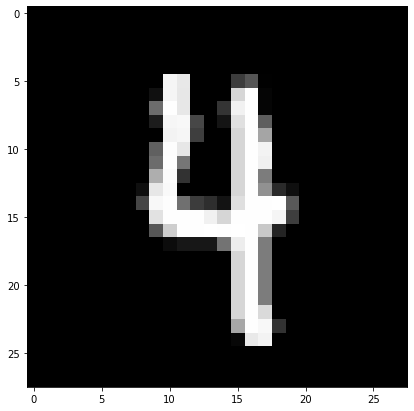

4


In [ ]:
# def alter(num):
#     return 1 - num

plt.figure(figsize = (7,7))

idx = 1014

mat = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(mat, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

#### Implementing PCA Manually

In [ ]:
# We will be using the whole Dataset
# Starndardising the Data

from sklearn.preprocessing import StandardScaler

standard_data = StandardScaler().fit_transform(d)

standard_data.shape

(42000, 784)

In [ ]:
# Calculating the Covariance Matrix

cov_matrix = np.matmul(standard_data.T, standard_data)
cov_matrix.shape

(784, 784)

In [ ]:
# Calculating the eigen values and eigen vectors of the Covariance Matric

from scipy.linalg import eigh 

values, vectors = eigh(cov_matrix, eigvals = (782,783))

vectors = vectors.T
vectors.shape

(2, 784)

In [ ]:
test_vals , _ = eigh(cov_matrix)

print("Percent of Information Retained = {}%".format(sum(values)/sum(test_vals) * 100))

Percent of Information Retained = 9.85964439387817%


In [ ]:
# Calculating the new dataset with reduced Dimensions using the calculted
# Eigen Vectors

reduced_data = np.matmul(vectors, standard_data.T)

# adding the label column to the new reduced dataset

reduced_data = np.vstack((reduced_data, l)).T
reduced_data = pd.DataFrame(reduced_data, 
                            columns = ("1st_Coordinate", "2nd_Coordinate", 
                                       "Label"))

reduced_data.head()

,1st_Coordinate,2nd_Coordinate,Label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


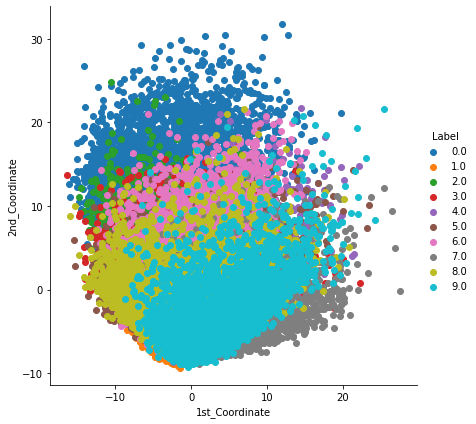

In [ ]:
# Plotting the newly reduced Dataset with two dimensions

import matplotlib.pyplot as plt
import seaborn as sns 

plot = sns.FacetGrid(reduced_data, hue = "Label", size = 6)
plot.map(plt.scatter, "1st_Coordinate", "2nd_Coordinate").add_legend()

#### Implementing PCA using Scikit-Learn

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.n_components = 2

reduced_data_sklearn = pca.fit_transform(standard_data)

In [ ]:
reduced_data_sklearn.shape

(42000, 2)

In [ ]:
reduced_data_sklearn  = np.vstack((reduced_data_sklearn.T, l)).T
reduced_data_sklearn.shape

(42000, 3)

   1st_Coordinate  2nd_Coordinate  Label
0       -5.140458       -5.227597    1.0
1       19.292333        6.032625    0.0
2       -7.644502       -1.704627    1.0
3       -0.474213        5.835284    4.0
4       26.559583        6.024892    0.0


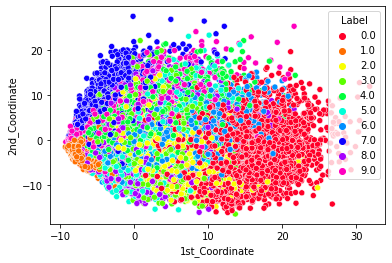

In [ ]:
reduced_data_sklearn = pd.DataFrame(reduced_data_sklearn, 
                                    columns=("1st_Coordinate","2nd_Coordinate", 
                                            "Label"))
print(reduced_data_sklearn.head())

sns.scatterplot(x="1st_Coordinate",y="2nd_Coordinate",legend="full",hue="Label",data=reduced_data_sklearn, palette = "gist_rainbow")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


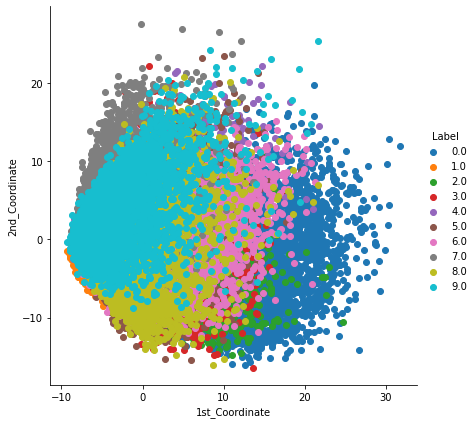

In [ ]:
sns.FacetGrid(reduced_data_sklearn, size = 6, hue = "Label").map(plt.scatter, "1st_Coordinate", "2nd_Coordinate").add_legend()

#### Using PCA to reduce the number of dimensions(Not Just for Visualization)

In [ ]:
pca.n_components = 784
pca_data_784 = pca.fit_transform(standard_data)

percentage_var_explained = pca.explained_variance_/sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

print(f"Shape of Data = {pca_data_784.shape}\n {cum_var_explained[:5]}")

Shape of Data = (42000, 784)
 [0.05747953 0.09859644 0.13642512 0.16582374 0.19138813]


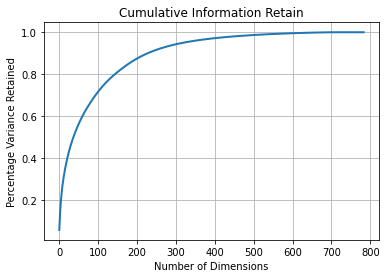

In [ ]:
plt.plot(cum_var_explained, linewidth = 2)
plt.xlabel("Number of Dimensions")
plt.ylabel("Percentage Variance Retained")
plt.title("Cumulative Information Retain")
plt.grid()

In [ ]:
# Reducing dimensions such that we preserve 90% of the information

for i in range(len(cum_var_explained)):
    if cum_var_explained[i] > 0.90:
        print(i)
        break

228


**At 228 dimensions we retain 90% of the information**

As we increase the number of dimensions, more of the variability is covered.
Using this Cumulative Plot we can make out the required number of dimensions to be used according to the percentage of variability retained(Information Retained) we want.

Example: In the above case we can use about **200 dimensions** to retain almost **90% of variability**

#### Using **t-SNE** for Visualization

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def model_MNIST(perp, num_iters, data, label):
    data_1000 = data
    labels_1000 = label
    model = TSNE(n_components = 2, random_state = 0, perplexity = perp, n_iter = num_iters)
    
    tsne_data = model.fit_transform(data_1000)
    
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    tsne_df = pd.DataFrame(tsne_data, columns = ('Dim1', 'Dim2', 'label'))
    sns.FacetGrid(tsne_df, hue = 'label', size = 10).map(sns.scatterplot, "Dim1","Dim2", palette = sns.hls_palette(10)).add_legend()
    plt.show()

In [ ]:
model_MNIST(50, 1000)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

In [ ]:
perplexities = [2, 30, 100, 200, 500, 1000]
n_iters = [300, 600, 1000, 2000, 5000]

for i in perplexities:
    model_MNIST(i, 1000)

In [ ]:
perplexities = [200, 500, 1000]
n_iters = [300, 600, 1000, 2000, 5000]

for i in perplexities:
    model_MNIST(i, 1000)

In [ ]:
model_MNIST(200, 5000)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


NameError: ignored

In [ ]:
# Reducing the 784 dimensions to 228 dimensions using PCA 
# And then applying t_SNE for visualization

pca.n_components = 228
pca_228 = pca.fit_transform(standard_data)

pca_228 = np.vstack((pca_228.T, l)).T

pca_228.shape

(42000, 229)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


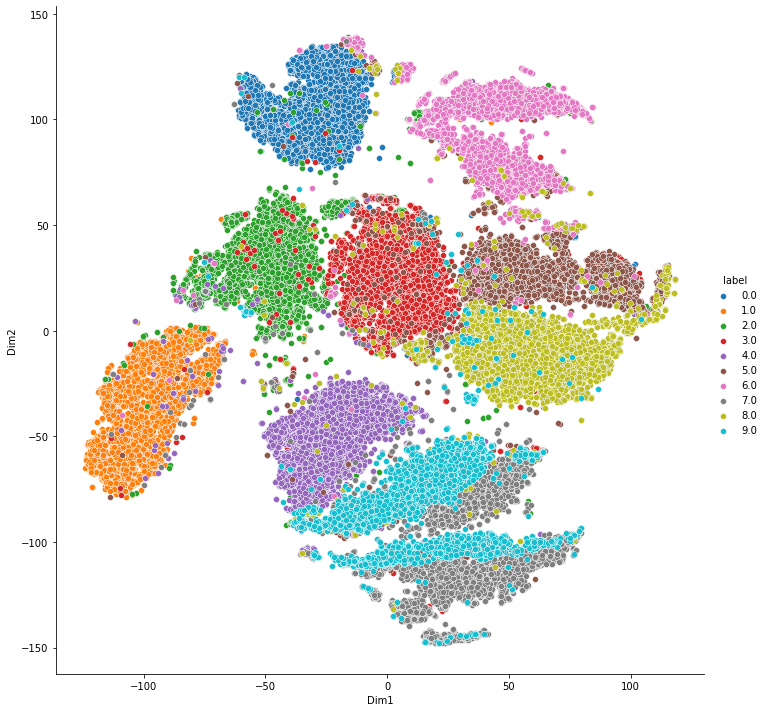

In [ ]:
#applying t-SNE on 1000 random samples first

MNIST_1000 = pd.DataFrame(pca_228)
MNIST_1000.shape

model_MNIST(80, 5000, MNIST_1000.iloc[:, :229], MNIST_1000.iloc[:, -1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


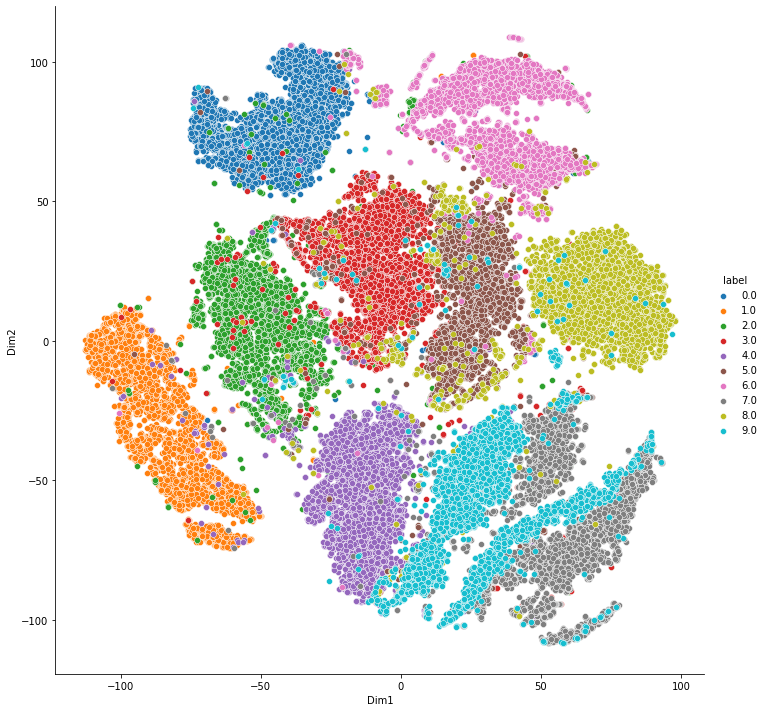

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 2000)

MNIST_1000 = pd.DataFrame(pca_228)

tsne_data = model.fit_transform(MNIST_1000.iloc[:, :229])
    
tsne_data = np.vstack((tsne_data.T, MNIST_1000.iloc[:, -1])).T
tsne_df = pd.DataFrame(tsne_data, columns = ('Dim1', 'Dim2', 'label'))
sns.FacetGrid(tsne_df, hue = 'label', size = 10).map(sns.scatterplot, "Dim1","Dim2", palette = sns.hls_palette(10)).add_legend()
plt.show()

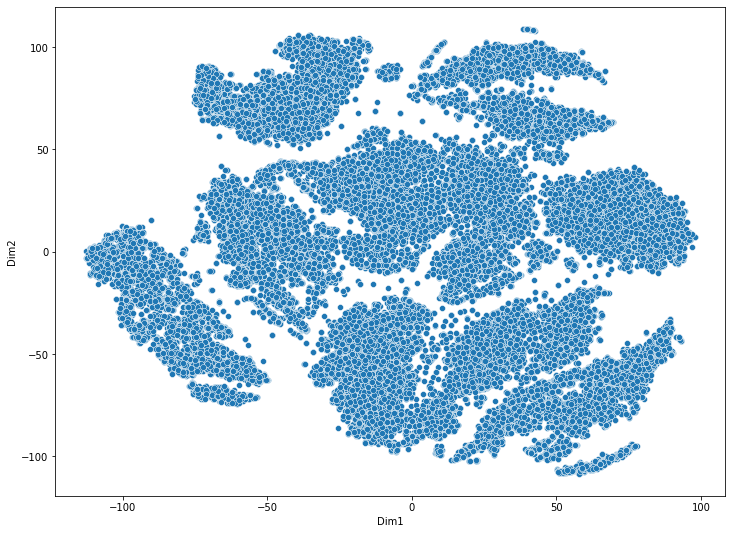

In [ ]:
plt.figure(figsize = (12, 9))
sns.scatterplot(data = tsne_df,x = "Dim1",y = "Dim2")